# Проект "Исследование общественного питания в Москве"

<strong> Описание проекта </strong>

Инвесторы попросили проанализировать рынок заведений питания Москвы и выявить самые перспективные места для размещения небольшого кафе, а также дать рекомендации о направлении заведения и количестве посадочных мест

<strong> Цель проекта </strong>

Подготовить исследование рынка на основе открытых данных о заведениях общественного питания в Москве

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-данных-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-данных-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка данных к анализу</a></span></li><li><span><a href="#Исследование-соотношения-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Исследование-соотношения-видов-объектов-общественного-питания-по-количеству-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование соотношения видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Исследование-соотношения-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Исследование-соотношения-сетевых-и-несетевых-заведений-по-количеству-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование соотношения сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Для-какого-вида-объекта-общественного-питания-характерно-сетевое-распространение?" data-toc-modified-id="Для-какого-вида-объекта-общественного-питания-характерно-сетевое-распространение?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Для какого вида объекта общественного питания характерно сетевое распространение?</a></span></li><li><span><a href="#Что-характерно-для-сетевых-заведений:-много-заведений-с-небольшим-числом-посадочных-мест-в-каждом-или-мало-заведений-с-большим-количеством-посадочных-мест?" data-toc-modified-id="Что-характерно-для-сетевых-заведений:-много-заведений-с-небольшим-числом-посадочных-мест-в-каждом-или-мало-заведений-с-большим-количеством-посадочных-мест?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</a></span></li><li><span><a href="#Описание-среднего-количества-посадочных-мест-для-каждого-вида-объекта-общественного-питания.-Какой-вид-предоставляет-в-среднем-самое-большое-количество-посадочных-мест?" data-toc-modified-id="Описание-среднего-количества-посадочных-мест-для-каждого-вида-объекта-общественного-питания.-Какой-вид-предоставляет-в-среднем-самое-большое-количество-посадочных-мест?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Какой вид предоставляет в среднем самое большое количество посадочных мест?</a></span></li><li><span><a href="#Выделение-информации-об-улице-в-отдельный-столбец" data-toc-modified-id="Выделение-информации-об-улице-в-отдельный-столбец-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выделение информации об улице в отдельный столбец</a></span></li><li><span><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания.-В-каких-районах-Москвы-находятся-эти-улицы?" data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания.-В-каких-районах-Москвы-находятся-эти-улицы?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?</a></span></li><li><span><a href="#Подсчёт-количества-улиц-с-одним-объектом-общественного-питания.-В-каких-районах-Москвы-находятся-эти-улицы?" data-toc-modified-id="Подсчёт-количества-улиц-с-одним-объектом-общественного-питания.-В-каких-районах-Москвы-находятся-эти-улицы?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Подсчёт количества улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?</a></span></li><li><span><a href="#Выводы-по-проекту-и-презентация" data-toc-modified-id="Выводы-по-проекту-и-презентация-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Выводы по проекту и презентация</a></span></li></ul></div>

## Загрузка данных и подготовка данных к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from io import BytesIO
import requests

In [2]:
spreadsheet_id = '1qUybHGufVBdlLX9GALhS-jo95gtuQIZyFq-iMhH2aLY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets.columns = ['street', 'areaid', 'okrug', 'area']

Итак, вспомогательная таблица состоит из 4 столбцов:
* `street` — название улицы;
* `areaid` — id района;
* `okrug` — название округа;
* `area` — название района;

Улица может принадлежать сразу к нескольким районам или административным округам. Для удобства можно сгруппировать эту информацию в ячейках:

In [3]:
moscow_streets = (
    moscow_streets
    .groupby('street', as_index=False)
    .agg({'okrug' : lambda x: ', '.join(np.unique(list(x)))
        , 'area' : lambda x: ', '.join(np.unique(list(x)))
         })
)

In [4]:
moscow_streets.head(10)

,street,okrug,area
0,1-й Автозаводский проезд,ЮАО,Даниловский район
1,1-й Амбулаторный проезд,САО,Район Аэропорт
2,1-й Архивный переулок,ЦАО,Район Хамовники
3,1-й Бабьегородский переулок,ЦАО,Район Якиманка
4,1-й Балтийский переулок,САО,Район Аэропорт
5,1-й Басманный переулок,ЦАО,"Басманный район, Красносельский район"
6,1-й Белокаменный проезд,ВАО,Район Богородское
7,1-й Богучарский переулок,ЮЗАО,Район Южное Бутово
8,1-й Ботанический проезд,СВАО,Район Свиблово
9,1-й Боткинский проезд,САО,Район Беговой


In [5]:
moscow_streets['number_of_areas'] = moscow_streets['area'].apply(lambda x: x.count(',') + 1)

In [6]:
moscow_streets.head(10)

,street,okrug,area,number_of_areas
0,1-й Автозаводский проезд,ЮАО,Даниловский район,1
1,1-й Амбулаторный проезд,САО,Район Аэропорт,1
2,1-й Архивный переулок,ЦАО,Район Хамовники,1
3,1-й Бабьегородский переулок,ЦАО,Район Якиманка,1
4,1-й Балтийский переулок,САО,Район Аэропорт,1
5,1-й Басманный переулок,ЦАО,"Басманный район, Красносельский район",2
6,1-й Белокаменный проезд,ВАО,Район Богородское,1
7,1-й Богучарский переулок,ЮЗАО,Район Южное Бутово,1
8,1-й Ботанический проезд,СВАО,Район Свиблово,1
9,1-й Боткинский проезд,САО,Район Беговой,1


Изучим основной датасет:

In [7]:
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Итак, таблица состоит из 6 столбцов:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест

`object_type` содержит тип заведения, проверим уникальные значения:

Чтобы упростить работы с графиками, можно сократить некоторые названия:

In [8]:
rest_data['object_type'] = (rest_data['object_type']
                            .replace(
                                ["предприятие быстрого обслуживания", "магазин (отдел кулинарии)"]
                              , ["ПБО", 'кулинария']
                            )
                           )

In [9]:
rest_data.query('object_type == "предприятие быстрого обслуживания"')['object_type']

Series([], Name: object_type, dtype: object)

Проверим данные на наличие дубликатов:

In [10]:
rest_data.drop_duplicates(subset=['id', 'object_name', 'address'], inplace=True)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 840.3+ KB


In [11]:
rest_data.drop_duplicates(subset=['object_name', 'object_type', 'address'], inplace=True)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15195 entries, 0 to 15364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15195 non-null  int64 
 1   object_name  15195 non-null  object
 2   chain        15195 non-null  object
 3   object_type  15195 non-null  object
 4   address      15195 non-null  object
 5   number       15195 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 831.0+ KB


Удален 171 дубликат

Также стоит изучить распределение посадочных мест на предмет аномалий:

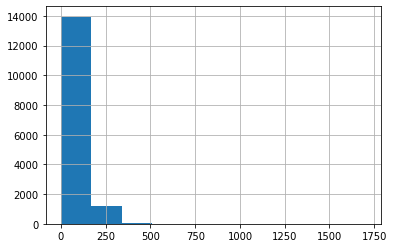

In [12]:
rest_data['number'].hist()
None

В данных есть заведения с очень большим количеством посадочных мест, технически такое возможно, например, для банкетных залов или столовых. Тем не мене, почти все данные находятся в диапазоне до 500 посадочных мест. Стоит изучить этот диапазон подробнее:

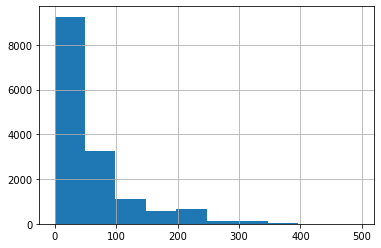

In [13]:
rest_data.query('number < 500')['number'].hist()
None

Наблюдается коцентрация значений в диапазоне до 50 мест. Можно дополнительно укрупнить интервал, чтобы убедиться, что в данных нет явных аномалий

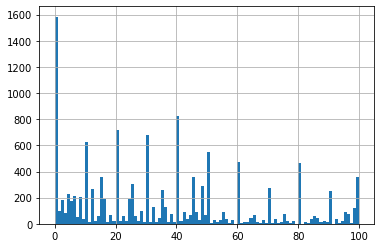

In [14]:
rest_data['number'].hist(bins=range(101));

По результатам предобработки:
* пропущенных значений не найдено
* явных дубликатов не найдено
* выбиваются рестораны без мест
* в распределении по посадочным местам явных ошибок и технических аномалий не найдено

## Исследование соотношения видов объектов общественного питания по количеству

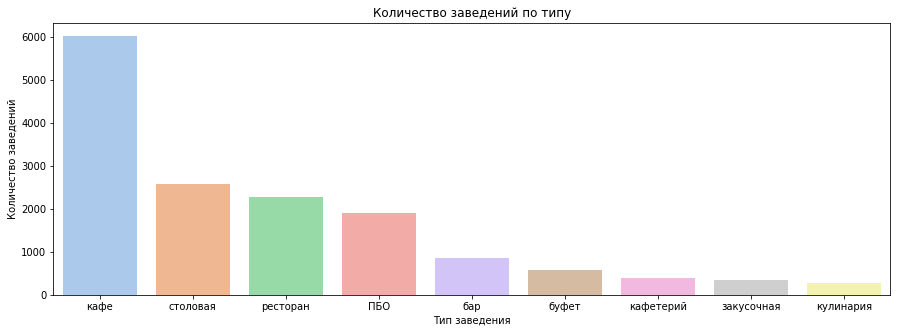

In [15]:
venues_number_by_type = (rest_data
                         .groupby('object_type', as_index=False)
                         .agg({'id' : 'nunique'})
                         .sort_values(by='id', ascending=False)
                        )

plt.figure(figsize=(15,5))

sns.set_palette("pastel")

ax = sns.barplot(x='object_type', y='id', data=venues_number_by_type)

ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество заведений')
ax.set_title('Количество заведений по типу')
None

Итак, кафе является самым частым заведением общественного питания. Кафе опережают столовые, находящиеся на 2-м месте более, чем в два раза. Реже всего встречаются отделы кулинарии в магазинах

## Исследование соотношения сетевых и несетевых заведений по количеству

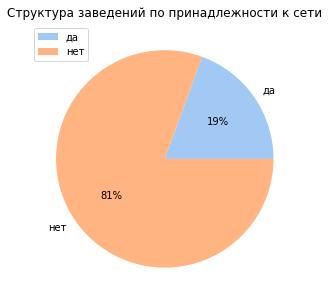

In [16]:
plt.figure(figsize=(5,5))

pie_table = rest_data.groupby('chain', as_index=False).agg({'id' : 'nunique'})


colors = sns.color_palette("pastel")

plt.pie(pie_table['id'], labels=pie_table['chain'], colors = colors, autopct='%.0f%%')

plt.title('Структура заведений по принадлежности к сети')
plt.legend()


None

Из всех 15 366 заведений к сетевым относятся лишь 19%

## Для какого вида объекта общественного питания характерно сетевое распространение?

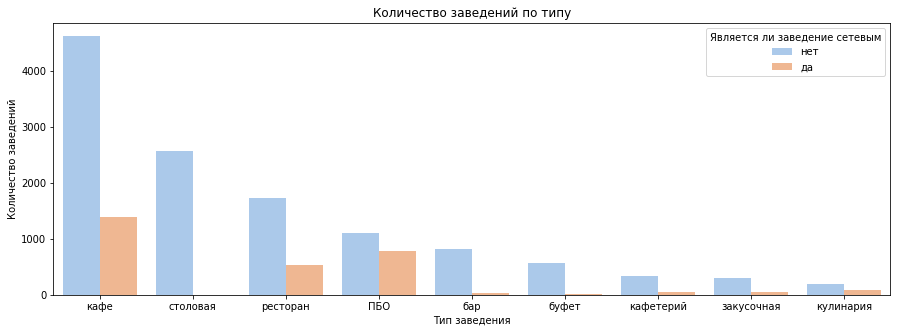

In [17]:
types_of_venues_by_chain = (rest_data
                            .groupby(['object_type', 'chain'], as_index=False)
                            .agg({'id' : 'nunique'})
                            .sort_values(by='id', ascending=False)
                           )
plt.figure(figsize=(15,5))

ax = sns.barplot(x='object_type', y='id', data=types_of_venues_by_chain, hue='chain')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество заведений')
ax.set_title('Количество заведений по типу')
ax.legend(title='Является ли заведение сетевым')
None

По графику можно увидеть, что больше всего сетевых заведений наблюдается у кафе, предприятий быстрого обслуживания и ресторанов. Для большей репрезентативности стоит показать долю сетевых заведений в общем количестве заведений конкретного типа

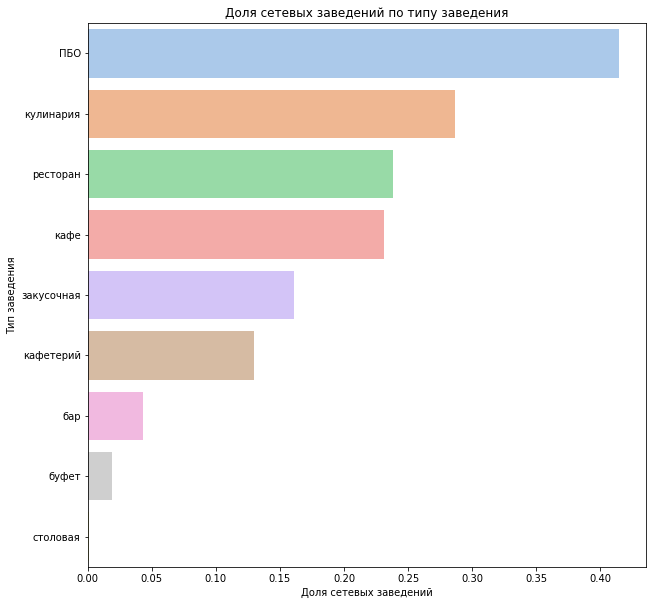

In [18]:
chain_share = rest_data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='nunique').reset_index()
chain_share['chain_share'] = chain_share['да'] / (chain_share['да'] + chain_share['нет'])

plt.figure(figsize=(10,10))

ax = sns.barplot(x='chain_share', y='object_type', data=chain_share.sort_values(by='chain_share', ascending=False))
ax.set_xlabel('Доля сетевых заведений')
ax.set_ylabel('Тип заведения')
ax.set_title('Доля сетевых заведений по типу заведения')
None

Сетевое распространение наиболее характерно для предприятий быстрого обслуживания, магазинов и ресторанов. Реже всего встречаются сетевые столовые. При этом даже у предприятий быстрого обслуживания сетевых заведений меньше половины

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

<Figure size 1080x1080 with 0 Axes>

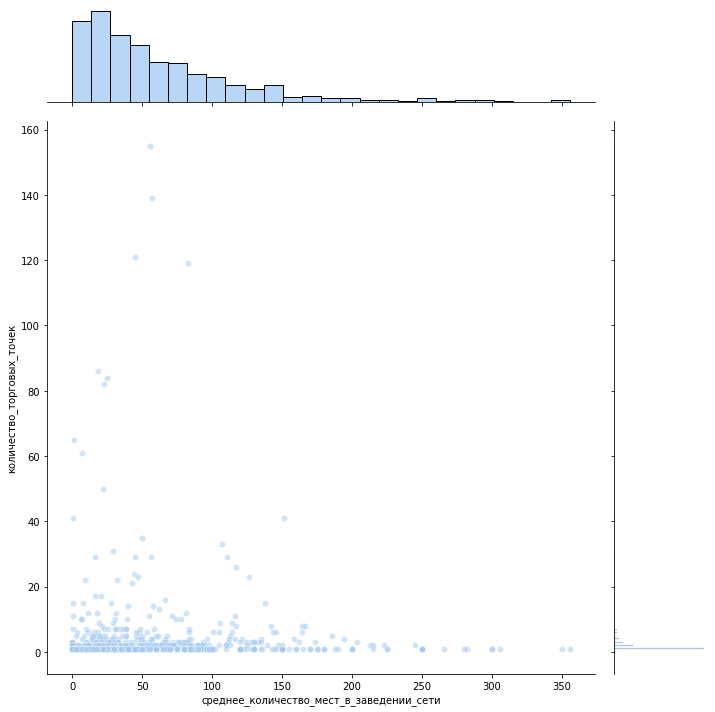

In [19]:
warnings.filterwarnings("ignore")

chain_table = (rest_data
               .query('chain == "да"')
               .groupby('object_name')
               .agg({'id' : 'nunique', 'number' : 'mean', 'object_type' : 'first'})
               .sort_values(by='id', ascending=False)
              )

chain_table.columns = ['количество_торговых_точек', 'среднее_количество_мест_в_заведении_сети', 'тип_заведения']
plt.figure(figsize=(15, 15))
ax = sns.jointplot(
    x='среднее_количество_мест_в_заведении_сети'
  , y='количество_торговых_точек'
  , data=chain_table
  , height=10
  , alpha=.5
)

None

<strong>По графику распределения можно сделать следующие выводы:</strong>

* с увеличением количества мест количество заведений в рамках одной сети снижается
* наблюдается концентрация сетей с небольшим количеством заведений (до 10) c количеством посадочных мест до 100 
* встречается 4 заведения с количеством заведений более 100: два ресторана, предприятие быстрого обслуживания и магазин с отделом кулинарии
* у всех заведений с количеством филиалов более 50 количество посадочных мест не превышает 100. В основном такие заведения имеют не более 50 посадочных мест
* чаще всего в сетях с количеством посадочных мест более 200 встречается 1 филиал в городе


Стоит подробнее рассмотреть распределение сетей с небольшим количеством заведений:

<Figure size 1080x1080 with 0 Axes>

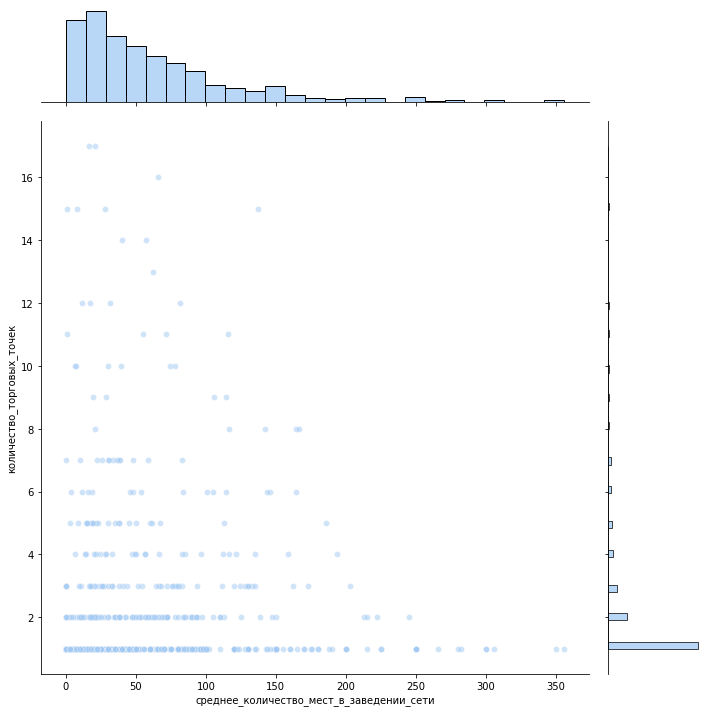

In [20]:
plt.figure(figsize=(15, 15))
ax = sns.jointplot(
    x='среднее_количество_мест_в_заведении_сети'
  , y='количество_торговых_точек'
  , data=chain_table.query('количество_торговых_точек < 20')
  , height=10
  , alpha=.5
)
None

<strong>По графику распределения сетей с количеством заведений до 20 можно сделать следующие выводы:</strong>

* при наличии одного заведения в Москве сеть может иметь любое количество мест
* больше всего сетей встречаются с количеством посадочных мест до 100 и количеством заведений до 7 включительно

<strong>Для более точного ответа на вопрос можно категоризировать места пол количеству сетей и среднему количеству мест:</strong>

* 25% верхних значений получат категорию "выше среднего"
* 25% нижних значений получат категорию "ниже среднего"
* остальные значения помечаем как нормальные

In [21]:
def categorizer(row, column):
    if row[column] >= np.quantile(chain_table[chain_table['тип_заведения'] == row['тип_заведения']][column], 0.75):
        return 'выше среднего'
    if row[column] <= np.quantile(chain_table[chain_table['тип_заведения'] == row['тип_заведения']][column], 0.25):
        return 'ниже среднего'
    else:
        return 'норма'

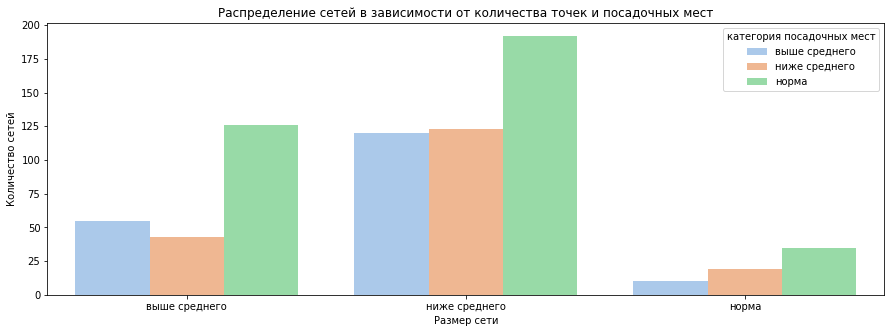

In [22]:
chain_table['размер_сети'] = chain_table.apply(lambda x: categorizer(x, 'количество_торговых_точек'), axis=1)
chain_table['категория_посадочных_мест'] = chain_table.apply(lambda x: categorizer(x, 'среднее_количество_мест_в_заведении_сети'), axis=1)

plt.figure(figsize=(15,5))

ax = sns.barplot(
    x='размер_сети'
  , y='количество_торговых_точек'
  , data=chain_table
    .groupby(['размер_сети', 'категория_посадочных_мест'], as_index=False)
    .agg({'количество_торговых_точек' : 'count'}), hue='категория_посадочных_мест')


ax.set_xlabel('Размер сети')
ax.set_ylabel('Количество сетей')
ax.set_title('Распределение сетей в зависимости от количества точек и посадочных мест')
ax.legend(title='категория посадочных мест')
None

В категорию `норма` по размеру сети вошло небольшое количество сетей. Это связано с тем, что сети с единственным филиалом - очень частый случай, который входит как в 1-й квартиль, так и в медианное значение.

По графику можно увидеть, что в больших сетях большое количество посадочных мест встречается чуть чаще, чем маленькое количество посадочных мест, однако разница между этими группами не такая большая - в основном в таких сетях количество мест находится в рамках нормы

Что касается маленьких сетей, в них почти с равной вероятностью может быть как большое, так и маленькое количество мест. Можно сказать, что технически мало заведений с большим количеством посадочных мест наиболее характерно для Москвы, нежели много заведений с небольшим количеством посадочных мест. Однако это связано, в первую очередь, с тем, что маленькие сети встречаются чаще, чем большие. Вне зависимости от размера сети, в ней с равной вероятностью может быть как много мест, так и мало мест

<strong>Финальные выводы по блоку:</strong>

* в основном сетевые заведения сосредоточены в рамках небольшого количества филиалов (до 7 включительно). При этом количество посадочных мест до 100 встречается крайне часто, до 150 реже и очень редко - более 200. Все сети с количеством посадочных мест более 200 не имеют более 2 филиалов в городе

## Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Какой вид предоставляет в среднем самое большое количество посадочных мест?

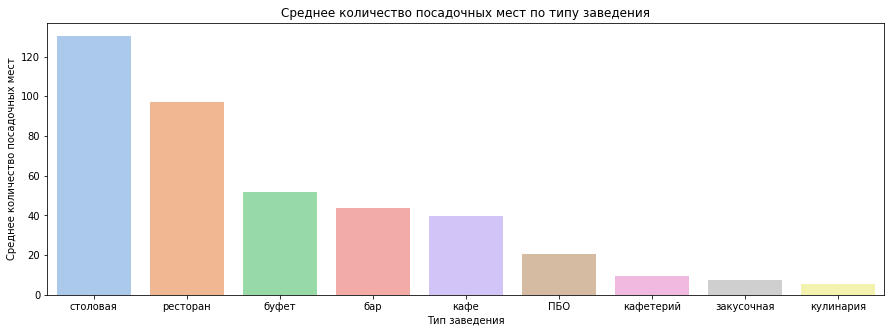

In [23]:
plt.figure(figsize=(15,5))

seats_by_object_type = (rest_data
                        .groupby('object_type', as_index=False)
                        .agg({'number' : 'mean'})
                        .sort_values(by='number', ascending=False)
                       )

ax = sns.barplot(x='object_type', y='number', data=seats_by_object_type)

ax.set_xlabel('Тип заведения')
ax.set_ylabel('Среднее количество посадочных мест')
ax.set_title('Среднее количество посадочных мест по типу заведения')
None

Наибольшее количество посадочных мест наблюдается в столовых, на втором месте рестораны. Меньше всего посадочных мест в закусочных и отделах кулинарии

Стоит понять, отличается ли ситуация в зависимости от принадлежности заведения к сети:

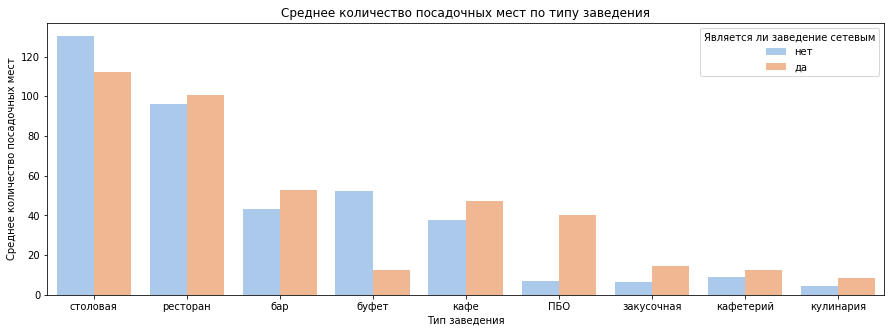

In [24]:
plt.figure(figsize=(15,5))

seats_by_object_type = (rest_data
                        .groupby(['object_type', 'chain'], as_index=False)
                        .agg({'number' : 'mean'})
                        .sort_values(by='number', ascending=False)
                       )

ax = sns.barplot(x='object_type', y='number', hue='chain', data=seats_by_object_type)

ax.set_xlabel('Тип заведения')
ax.set_ylabel('Среднее количество посадочных мест')
ax.legend(title='Является ли заведение сетевым')
ax.set_title('Среднее количество посадочных мест по типу заведения')
None

Для всех типов заведений за исключением столовых и буфетов принадлежность к сети повышает среднее количество посадочных мест. Наиболее явно это заметно для предприятий быстрого обслуживания

## Выделение информации об улице в отдельный столбец

Для того, чтобы выделить название улицы в отдельный столбец, "отрежем" хвост, который описывает конкретный номер дома, владения, домовладения или корпуса (в некоторых случаях дом могут называть корпусом). После это можно убрать название города. Оставшаяся часть - это и есть название дорожного объекта

In [25]:
rest_data['street'] = (rest_data['address']
                       .apply(
                           lambda x: 
                           x.split(', дом ')[0]
                           .split(', владение ')[0]
                           .split(', домовладение ')[0]
                           .split(', корпус ')[0]
                           .split('город Москва, ')[-1]
                             )
                      )


In [26]:
venues_by_street = (rest_data
                    .groupby('street')
                    .agg({'id' : 'nunique'})
                    .sort_values(by='id', ascending=False)
                   )

venues_by_street.head(10)

,id
street,
проспект Мира,197
Профсоюзная улица,181
Ленинградский проспект,172
Пресненская набережная,165
Варшавское шоссе,161
Ленинский проспект,148
город Зеленоград,128
проспект Вернадского,127
Кутузовский проспект,114


<strong>По таблице можно сделать следующие выводы:</strong>
* В топ самых популярных улиц попали большие магистрали. Это связано с их большой протяжённостью. К большим магистралям можно отнести шоссе и проспекты. Для большей репрезентативности данных желательно сравнивать шоссе и проспекты отдельно от улиц, бульваров и переулков. Для этого во вспомогательной таблице есть данные о том, во сколько районов входит конкретная улица
* В топ самых популярных улиц попал город Зеленоград. Сравнение города и дорожного объекта некорректно

<strong>Для начала назначим каждой улице категорию:</strong>

In [27]:
def street_categorizer(row):
    if 'проспект' in row.lower() or 'шоссе' in row.lower():
        return True
    else: 
        return False
    
rest_data['is_highway'] = rest_data['address'].apply(street_categorizer)

<strong>Затем изучим адреса Зеленограда:</strong>

In [28]:
rest_data.query('street == "город Зеленоград"')

,id,object_name,chain,object_type,address,number,street,is_highway
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,город Зеленоград,False
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,город Зеленоград,False
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,город Зеленоград,False
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,город Зеленоград,False
1410,150537,Кафе «Вечный зов»,нет,кафе,"город Москва, город Зеленоград, корпус 834А",30,город Зеленоград,False
...,...,...,...,...,...,...,...,...
14468,205933,Кафе «Империя бургеров»,нет,кафе,"город Москва, город Зеленоград, корпус 1106Е",24,город Зеленоград,False
14470,220595,Пекарня № 1,нет,кафетерий,"город Москва, город Зеленоград, корпус 1627",6,город Зеленоград,False
14473,220978,Бар суши TAKAI,нет,кафе,"город Москва, город Зеленоград, корпус 1602А",28,город Зеленоград,False
14478,211676,Никольский,нет,ресторан,"город Москва, город Зеленоград, корпус 532",120,город Зеленоград,False


Город Зеленоград попал в топ, так как он записан в качестве улицы - через запятую после названия города следует корпус. Сравнение дорожного объекта с городом некорректно, поэтому лучшее решение - исключить Зеленоград из данных

In [29]:
rest_data_filtered = rest_data.query('street != "город Зеленоград"')

Дополним информацию об улице данными о районах:

In [30]:
rest_data_filtered = rest_data_filtered.merge(moscow_streets, on='street', how='left')

In [31]:
rest_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15067 entries, 0 to 15066
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15067 non-null  int64  
 1   object_name      15067 non-null  object 
 2   chain            15067 non-null  object 
 3   object_type      15067 non-null  object 
 4   address          15067 non-null  object 
 5   number           15067 non-null  int64  
 6   street           15067 non-null  object 
 7   is_highway       15067 non-null  bool   
 8   okrug            14232 non-null  object 
 9   area             14232 non-null  object 
 10  number_of_areas  14232 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 1.3+ MB


Почти у всех улиц появился округ и район. Остальным улицам можно назначить `unknown` по районам и округам и `1` в столбец `number_of_areas`

In [32]:
rest_data_filtered[['okrug', 'area']] = rest_data_filtered[['okrug', 'area']].fillna('unknown')
rest_data_filtered['number_of_areas'] = rest_data_filtered['number_of_areas'].fillna(1)

## Топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?

Для начала создадим агрегированную таблицу, к которой будем обращаться при создании графиков

In [33]:
venues_by_street = (rest_data_filtered
                    .groupby(['street', 'is_highway'], as_index=False)
                    .agg({'id' : 'nunique', 'okrug' : 'first', 'area' : 'first', 'number_of_areas' : 'first'})
                    .sort_values(by='id', ascending=False)
                   )

venues_by_street.columns = ['street', 'is_highway', 'number_of_venues', 'okrug', 'area', 'number_of_areas']

venues_by_street.head(10)

,street,is_highway,number_of_venues,okrug,area,number_of_areas
1588,проспект Мира,True,197,"СВАО, ЦАО","Алексеевский район, Мещанский район, Останкинс...",7.0
996,Профсоюзная улица,False,181,ЮЗАО,"Академический район, Обручевский район, Район ...",6.0
683,Ленинградский проспект,True,172,САО,"Район Аэропорт, Район Беговой, Район Сокол, Хо...",4.0
981,Пресненская набережная,False,165,ЦАО,Пресненский район,1.0
406,Варшавское шоссе,True,161,"ЮАО, ЮЗАО","Донской район, Нагорный район, Район Нагатино-...",8.0
686,Ленинский проспект,True,148,"ЗАО, ЦАО, ЮАО, ЮЗАО","Донской район, Ломоносовский район, Обручевски...",8.0
1585,проспект Вернадского,True,127,"ЗАО, ЮЗАО","Ломоносовский район, Район Гагаринский, Район ...",5.0
674,Кутузовский проспект,True,114,ЗАО,"Район Дорогомилово, Район Фили-Давыдково",2.0
600,Каширское шоссе,True,110,ЮАО,"Район Москворечье-Сабурово, Район Нагатино-Сад...",4.0
605,Кировоградская улица,False,107,ЮАО,"Район Чертаново Северное, Район Чертаново Цент...",3.0


<strong>Рейтинг по всем дорожным объектам:</strong>

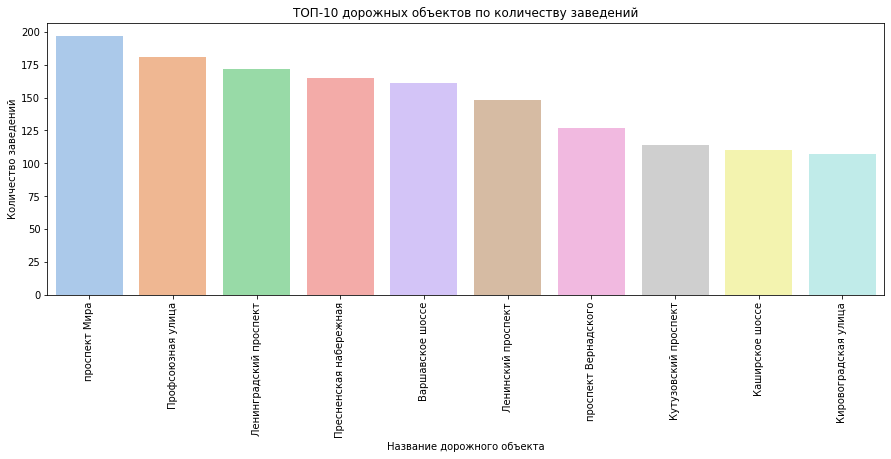

In [34]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

ax = sns.barplot(x='street', y='number_of_venues', data=venues_by_street.head(10))

ax.set_xlabel('Название дорожного объекта')
ax.set_ylabel('Количество заведений')
ax.set_title('ТОП-10 дорожных объектов по количеству заведений')
None

<strong>Рейтинг по большим дорожным объектам:</strong>

Большими дорожными объектами считаем те, которые входят в более чем 1 район Москвы

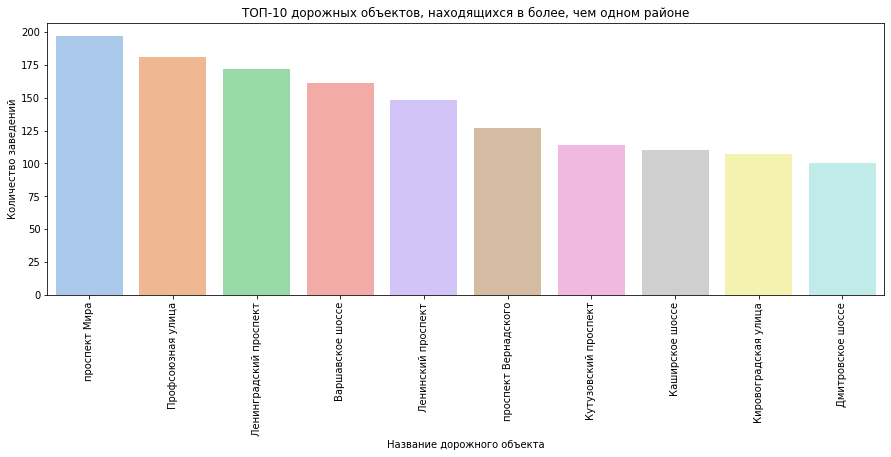

In [35]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

ax = sns.barplot(
    x='street'
  , y='number_of_venues'
  , data=venues_by_street[(venues_by_street['number_of_areas'] > 1)|(venues_by_street['is_highway'] == True)].head(10))

ax.set_xlabel('Название дорожного объекта')
ax.set_ylabel('Количество заведений')
ax.set_title('ТОП-10 дорожных объектов, находящихся в более, чем одном районе')
None

<strong>Рейтинг по объектам, исключая большие магистрали и длинные улицы:</strong>

Исключаем из списка проспекты, шоссе, а также улицы, которые входят в более чем 1 район Москвы

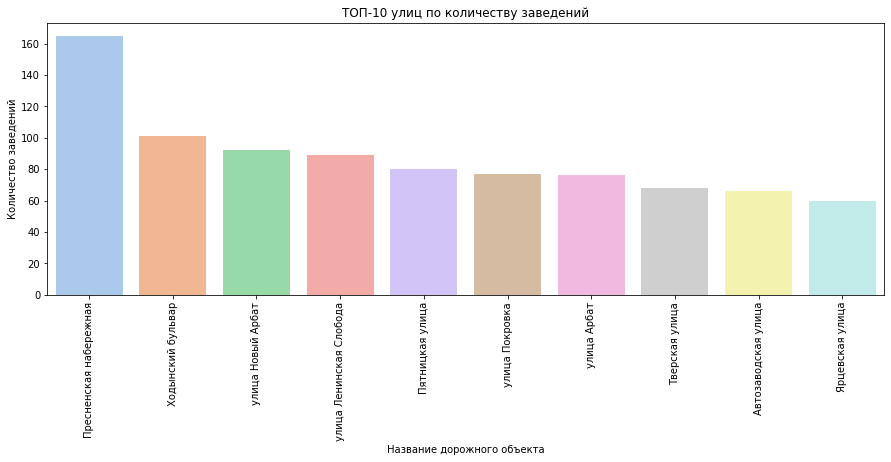

In [36]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

ax = sns.barplot(
    x='street'
  , y='number_of_venues'
  , data=venues_by_street[(venues_by_street['number_of_areas'] == 1)&(venues_by_street['is_highway'] == False)].head(10))

ax.set_xlabel('Название дорожного объекта')
ax.set_ylabel('Количество заведений')
ax.set_title('ТОП-10 улиц по количеству заведений')
None

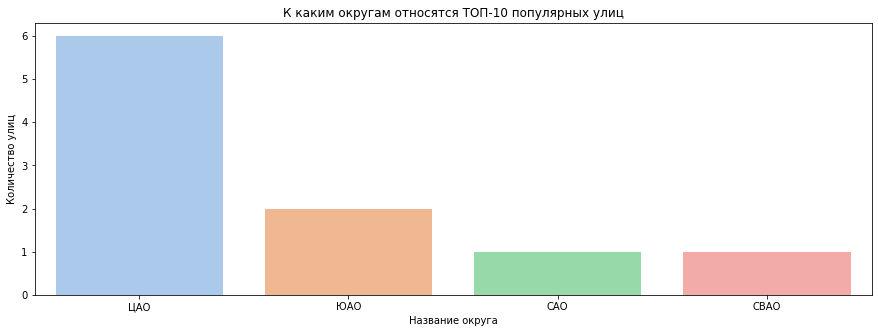

In [37]:
plt.figure(figsize=(15,5))

top_streets = (venues_by_street
                        .query('number_of_areas == 1')
                        .sort_values(by='number_of_venues', ascending=False)
                        .head(10)
                       )
ax = sns.barplot(
    x='okrug'
  , y='street'
  , data=(top_streets
          .groupby('okrug', as_index=False)
          .agg({'street' : 'count'})
          .sort_values(by='street', ascending=False)
         )
)
ax.set_xlabel('Название округа')
ax.set_ylabel('Количество улиц')
ax.set_title('К каким округам относятся ТОП-10 популярных улиц')
None

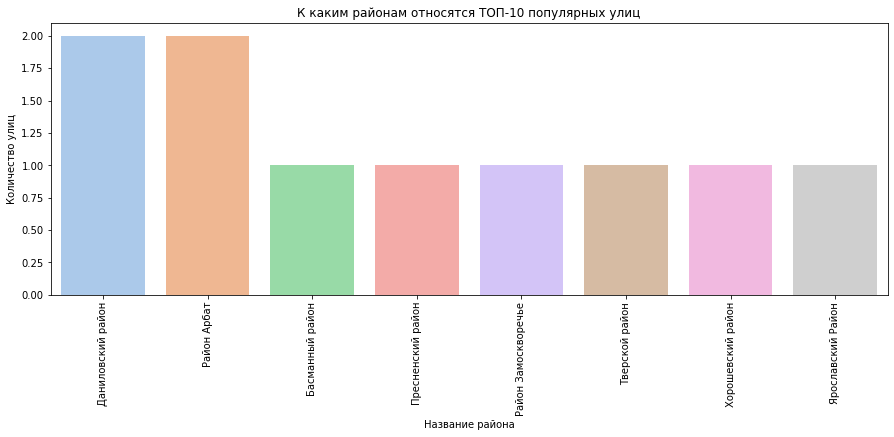

In [38]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

ax = sns.barplot(
    x='area'
  , y='street'
  , data=(top_streets
          .groupby('area', as_index=False)
          .agg({'street' : 'count'})
          .sort_values(by='street', ascending=False)
         )
)
ax.set_xlabel('Название района')
ax.set_ylabel('Количество улиц')
ax.set_title('К каким районам относятся ТОП-10 популярных улиц')
None

<strong>Выводы по блоку:</strong>
* Если исключить длинные улицы, проспекты и шоссе, то 6 из 10 популярных улиц будут находиться в ЦАО. ТОП-10 популярных улиц распределены по районам равномерно, есть только два района, в которые вошли более одной популярной улицы из ТОП-10: Даниловский район и район Арбат 

## Подсчёт количества улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?

In [39]:
print(venues_by_street.query('number_of_venues == 1')['street'].count())
venues_by_street.query('number_of_venues == 1')['street'].count() / venues_by_street['street'].count()

628


0.30844793713163066

Наблюдается 628 дорожных объектов, на которых находится всего 1 заведение общественного питания. Это 31% от всех дорожных объектов Москвы с хотя бы одним заведением общественного питания

Создадим отфильтрованную таблицу, к которой будем обращаться для построения графиков. Таблица будет включать только те улицы, в которых есть только одно заведение, при этом в этих улицах корректно определен район и округ, и улица входит только в один район Москвы

In [40]:
low_competition_streets = (venues_by_street
    [(venues_by_street['number_of_venues'] == 1)&(venues_by_street['number_of_areas'] == 1)&(venues_by_street['area'] != 'unknown')]
)

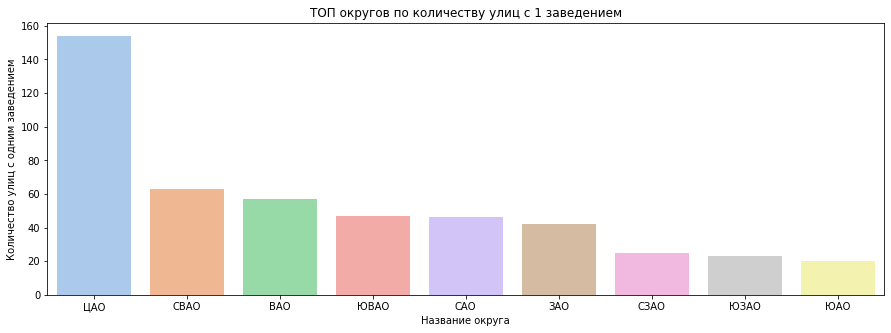

In [41]:
plt.figure(figsize=(15,5))

ax = sns.barplot(
    x='okrug'
  , y='street'
  , data = (low_competition_streets
            .groupby('okrug', as_index=False)
            .agg({'street' : 'count'})
            .sort_values(by='street', ascending=False)
          )
)
ax.set_xlabel('Название округа')
ax.set_ylabel('Количество улиц с одним заведением')
ax.set_title('ТОП округов по количеству улиц с 1 заведением')
None

Среди административных округов лидирует ЦАО. В этот же административный округ входят 6 из 10 самых популярных улиц по количеству заведений. То есть в этом округе можно вероятнее найти улицу с оптимальным соотношением конкуренции и проходимостью

Информация по району даст более точные представления о потенциально интересных местах размещения нового заведения:

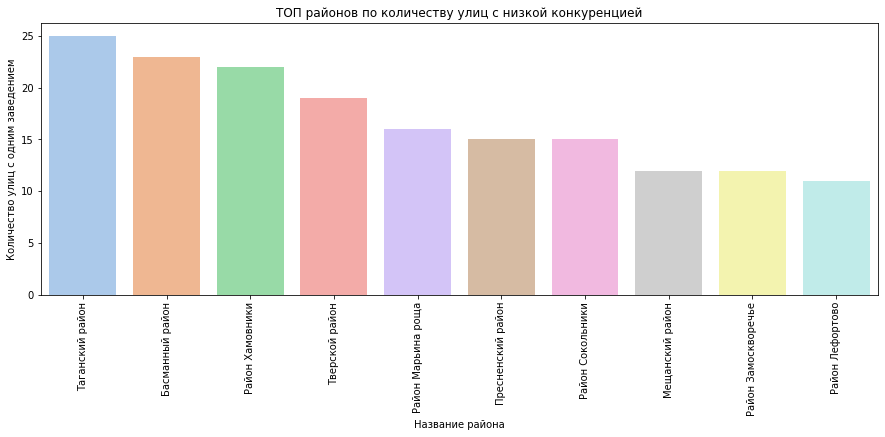

In [42]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

ax = sns.barplot(
    x='area'
  , y='street'
  , data = (low_competition_streets
            .groupby(['area', 'okrug'], as_index=False)
            .agg({'street' : 'count'})
            .sort_values(by='street', ascending=False)
            .head(10)
          )
)
ax.set_xlabel('Название района')
ax.set_ylabel('Количество улиц с одним заведением')
ax.set_title('ТОП районов по количеству улиц с низкой конкуренцией')
None

Таганский район лидирует. Примечательно, что районы Пресненский, Басманный, Тверской и Замоскворечье уже фигурировали в другом ТОПе - в эти районы входят одни из 10 самых популярных улиц

<strong>Финальные выводы по блоку</strong>

* Улицы с 1 заведением составляют 31% от общего количества улиц
* Больше всего таких улиц в ЦАО
* В районах Пресненский, Басманный, Тверской и Замоскворечье находятся не только одни из самых популярных улиц. Эти районы также входят в ТОП-10 по количеству улиц с одним заведением

## Выводы по проекту и презентация

В результате исследования было выявлено:

<strong>По типу заведения:</strong>
* Среди заведений общественного питания чаще всего встречаются кафе. Реже всего - закусочные и отделы кулинарии в магазине
* Из всех заведений общественного питания к сетевым относятся 21%. Для предприятий быстрого обслуживания сетевое распространение характернее всего - сетевые заведения составляют около 40% от всех предприятий быстрого обслуживания. Почти нет сетевых заведений среди столовых. При этом в абсолютном количестве среди сетевых заведений больше всего кафе

<strong>По количеству посадочных мест:</strong>
* Большинство сетей имеют не более 7 заведений и не более 100 посадочных мест в среднем. Сети с более чем 200 местами владеют не более чем 2 точками в Москве. Небольшие сети с большим количеством посадочных мест, как и большие сети с небольшим количеством посадочных мест, встречаются редко
* Для сетевых кафе с количеством филиалов более 5 среднее количество посадочных мест редко превышает 50
* Больше всего посадочных мест наблюдается в столовых и ресторанах, меньше всего - в закусочных и отделах кулинарии
* У маленькой сети, ровно как и у большой сети, с равной вероятностью может быть как количество мест выше среднего, так и количество мест ниже среднего

<strong>По расположению:</strong>
* Если исключить из списка шоссе, проспекты и улицы, входящие в несколько районов, то 6 из 10 самых популярных улиц находятся в ЦАО
* 10 самых популярных улиц распределяются по разным районам равномерно. Выделяются два района: Даниловский и район Арбат. В этих районах есть 2 улицы из топа
* В Москве найдено 628 улиц с всего одним заведением. Таких улиц больше всего в ЦАО. Среди районов по таким улицам лидирует Таганский. Районы Пресненский, Басманный, Тверской и Замоскворечье фигурирует сразу в двух топах: в них есть самые популярные улицы из топ-10, а также они одни из лидеров по количеству улиц с всего одним заведением

<strong>Рекомендации по проекту стартапа:</strong>

* Кафе как тип заведения является самым популярным, рекомендуем ориентироваться именно на такой формат
* Среднее количество посадочных мест в кафе - 40, рекомендуем ориентироваться на это количество мест
* Сетевое распространение характерно для 23% всех заведений кафе. Кафе с количеством филиалов более 7 - редкость, стоит учитывать эту информацию при подсчёте потенциальной прибыли проекта, если предусмотрена экспансия
* При выборе места рекомендуем обратить внимание на район Пресненский, Басманный, Тверской и Замоскворечье: здесь есть как популярные улицы, так и достаточное количество улиц с низкой конкуренцией